# 데이터 분리(Splitting Data)

- 머신 러닝(딥 러닝) 모델에 데이터를 훈련시키기 위해서는 데이터를 적절히 분리하는 작업이 필요

## 1. 지도 학습(Supervised Learning)

- 지도 학습의 훈련 데이터는 문제지를 연상케 합니다. 
- 지도 학습의 훈련 데이터는 정답이 무엇인지 맞춰 하는 '문제'에 해당되는 데이터와 레이블( label )이라고 부르는 '정답'이 적혀있는 데이터로 구성되어 있습니다. 
- 기계는 정답이 적혀져 있는 문제지를 문제와 정답을 함께 보면서 열심히 공부하고, 향후에 정답이 없는 문제에 대해서도 정답을 잘 예측해야 합니다.


- 예로 스팸 메일 분류기를 만들기 위한 데이터같은 경우에는 메일의 내용과 해당 메일이 정상 메일인지, 스팸 메일인지 적혀있는 레이블로 구성되어져 있습니다. 
- 아래와 같은 형식의 데이터가 약 20,000개 있다고 가정


|텍스트(메일의 내용)|레이블(스팸 여부)|
|:---|:---|
|당신에게 드리는 마지막 혜택! ...|스팸 메일|
|내일 뵐 수 있을지 확인 부탁...|정상 메일|
|...|...|
|(광고) 멋있어질 수 있는...|스팸 메일|


- 기계를 가르치기 위해서 데이터를 총 4개로 나눕니다. 
- 우선 메일의 내용이 담긴 첫번째 열을 X에 저장합니다. 그리고 메일이 스팸인지 정상인지 정답이 적혀있는 두번째 열을 y에 저장합니다. 이제 문제지에 해당되는 20,000개의 X와 정답지에 해당되는 20,000개의 y가 생겼습니다
- X와 y에 대해서 일부 데이터를 또 다시 분리합니다. 
- 이는 문제지를 다 공부하고나서 실력을 평가하기 위해서 시험(Test)용으로 일부로 일부 문제와 정답지를 빼놓는 것입니다. 
- 여기서는 2,000개를 분리한다고 가정하겠습니다. 이 때, 분리시에는 여전히 X와 y의 맵핑 관계를 유지해야 합니다. 
- 어떤 X(문제)에 대한 어떤 y(정답)인지 바로 찾을 수 있어야 합니다. 이렇게 되면 학습용에 해당되는 18,000개의 X, y의 쌍과 시험용에 해당되는 2000개의 X, y의 쌍이 생깁니다


<훈련 데이터>  
X_train : 문제지 데이터  
y_train : 문제지에 대한 정답 데이터.  
  
<테스트 데이터>  
X_test : 시험지 데이터.  
y_test : 시험지에 대한 정답 데이터.  
  
- X_train과 y_train에 대해서 학습을 합니다. 
- 기계는 현 상태에서는 정답지인 y_train을 볼 수 있기 때문에 18,000개의 문제지 X_train을 보면서 어떤 메일 내용일 때 정상 메일인지 스팸 메일인지를 열심히 규칙을 도출해나가면서 정리해나갑니다. 
- 그리고 학습을 다 한 기계에게 y_test는 보여주지 않고, X_test에 대해서 정답을 예측하게 합니다. 
- 그리고 기계가 예측한 답과 실제 정답인 y_test를 비교하면서 기계가 정답을 얼마나 맞췄는지를 평가합니다. 
- 이 수치가 기계의 정확도(Accuracy)가 됩니다.

## 2. X와 y분리

### 1) zip 함수를 이용하여 분리

- zip()함수는 동일한 개수를 가지는 시퀀스 자료형에서 각 순서에 등장하는 원소들끼리 묶어주는 역할을 합니다. 
- 리스트의 리스트 구성에서 zip 함수는 X와 y를 분리하는데 유용합니다.

In [1]:
X,y = zip(['a', 1], ['b', 2], ['c', 3])
print(X)
print(y)

('a', 'b', 'c')
(1, 2, 3)


In [2]:
# 데이터에서 첫번째로 등장한 원소들끼리 묶이고, 두번째로 등장한 원소들끼리 묶인 것
sequences=[['a', 1], ['b', 2], ['c', 3]] # 리스트의 리스트 또는 행렬 또는 2D 텐서.
X,y = zip(*sequences) # *를 추가
print(X)
print(y)

('a', 'b', 'c')
(1, 2, 3)


### 2) 데이터프레임을 이용하여 분리

In [3]:
import pandas as pd

values = [['당신에게 드리는 마지막 혜택!', 1],
['내일 뵐 수 있을지 확인 부탁드...', 0],
['도연씨. 잘 지내시죠? 오랜만입...', 0],
['(광고) AI로 주가를 예측할 수 있다!', 1]]
columns = ['메일 본문', '스팸 메일 유무']

df = pd.DataFrame(values, columns=columns)
df

,메일 본문,스팸 메일 유무
0,당신에게 드리는 마지막 혜택!,1
1,내일 뵐 수 있을지 확인 부탁드...,0
2,도연씨. 잘 지내시죠? 오랜만입...,0
3,(광고) AI로 주가를 예측할 수 있다!,1


In [4]:
# 데이터프레임은 열의 이름으로 각 열에 접근이 가능하므로, 이를 이용하면 손쉽게 X 데이터와 y 데이터를 분리
X=df['메일 본문']
y=df['스팸 메일 유무']

In [5]:
print(X)

0          당신에게 드리는 마지막 혜택!
1      내일 뵐 수 있을지 확인 부탁드...
2      도연씨. 잘 지내시죠? 오랜만입...
3    (광고) AI로 주가를 예측할 수 있다!
Name: 메일 본문, dtype: object


In [6]:
print(y)

0    1
1    0
2    0
3    1
Name: 스팸 메일 유무, dtype: int64


### 3) NumPy를 이용하여 분리

In [7]:
import numpy as np

In [8]:
ar = np.arange(0,16).reshape((4,4))
print(ar)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [9]:
X=ar[:, :3]
print(X)

[[ 0  1  2]
 [ 4  5  6]
 [ 8  9 10]
 [12 13 14]]


In [10]:
y=ar[:,3]
print(y)

[ 3  7 11 15]


## 3. 테스트 데이터 분리

- 이미 X와 y가 분리된 데이터에 대해서 테스트 데이터를 분리하는 과정

### 1) 사이킷 런을 이용하여 분리

- 훈련 데이터와 테스트 데이터를 유용하게 나눌 수 있는 하나의 방법
- 사이킷 런은 학습용 테스트와 테스트용 데이터를 분리하게 해주는 train_test_split를 지원

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1234)

X : 독립 변수 데이터. (배열이나 데이터프레임)  
y : 종속 변수 데이터. 레이블 데이터.  
test_size : 테스트용 데이터 개수를 지정한다. 1보다 작은 실수를 기재할 경우, 비율을 나타낸다.  
train_size : 학습용 데이터의 개수를 지정한다. 1보다 작은 실수를 기재할 경우, 비율을 나타낸다.  
(test_size와 train_size 중 하나만 기재해도 가능)  
random_state : 난수 시드

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split

In [14]:
X, y = np.arange(10).reshape((5, 2)), range(5)
# 실습을 위해 임의로 X와 y가 이미 분리 된 데이터를 생성
print(X)
print(list(y)) #레이블 데이터

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[0, 1, 2, 3, 4]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)
#3분의 1만 test 데이터로 지정.
#random_state 지정으로 인해 순서가 섞인 채로 훈련 데이터와 테스트 데이터가 나눠진다.

In [17]:
print(X_train)
print(X_test)

[[2 3]
 [4 5]
 [6 7]]
[[8 9]
 [0 1]]


In [18]:
print(y_train)
print(y_test)

[1, 2, 3]
[4, 0]


### 2) 수동으로 분리

- 데이터를 분리하는 방법 중 하나는 수동으로 분리

In [19]:
import numpy as np

In [20]:
X, y = np.arange(0,24).reshape((12,2)), range(12)
# 실습을 위해 임의로 X와 y가 이미 분리 된 데이터를 생성

In [21]:
print(X)

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]
 [20 21]
 [22 23]]


In [22]:
print(list(y))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [23]:
# 이제 훈련 데이터의 개수와 테스트 데이터의 개수를 정해보겠습니다. 
# n_of_train은 훈련 데이터의 개수를 의미하며, n_of_test는 테스트 데이터의 개수를 의미합니다.
n_of_train = int(len(X) * 0.8) # 데이터의 전체 길이의 80%에 해당하는 길이값을 구한다.
n_of_test = int(len(X) - n_of_train) # 전체 길이에서 80%에 해당하는 길이를 뺀다.
print(n_of_train)
print(n_of_test)

9
3


- 주의할 점은 아직 훈련 데이터와 테스트 데이터를 나눈 것이 아니라, 이 두 개의 개수를 몇 개로 할지 정하기만 한 상태

- n_of_train을 len(X) * 0.8로 구했듯이 n_of_test 또한 len(X) * 0.2로 계산하면 되지 않을까라고 생각할 수 있지만, 
- 그렇게 할 경우에는 데이터에 누락이 발생합니다. 
- 예를 들어서 전체 데이터의 개수가 4,518이라고 가정했을 때 4,518의 80%의 값은 3,614.4로 소수점을 내리면 3,614가 됩니다. 
- 또한 4,518의 20%의 값은 903.6으로 소수점을 내리면 903이 됩니다. 
- 그리고 3,614 + 903 = 4517이므로 데이터 1개가 누락된 것을 알 수 있습니다. 
- 그러므로 어느 한 쪽을 먼저 계산하고 그 값만큼 제외하는 방식으로 계산해야 합니다.

In [24]:
X_test = X[n_of_train:] #전체 데이터 중에서 20%만큼 뒤의 데이터 저장
y_test = y[n_of_train:] #전체 데이터 중에서 20%만큼 뒤의 데이터 저장
X_train = X[:n_of_train] #전체 데이터 중에서 80%만큼 앞의 데이터 저장
y_train = y[:n_of_train] #전체 데이터 중에서 80%만큼 앞의 데이터 저장

In [25]:
# 실제로 데이터를 나눌 때도 n_of_train와 같이 하나의 변수만 사용하면 데이터의 누락을 방지할 수 있습니다. 
# 앞에서 구한 데이터의 개수만큼 훈련 데이터와 테스트 데이터를 분할합니다.
print(X_test)
print(list(y_test))

[[18 19]
 [20 21]
 [22 23]]
[9, 10, 11]


# 선형 회귀(Linear Regression)

시험 공부하는 시간을 늘리면 늘릴 수록 성적이 잘 나옵니다. 하루에 걷는 횟수를 늘릴 수록, 몸무게는 줄어듭니다. 
집의 평수가 클수록, 집의 매매 가격은 비싼 경향이 있습니다. 
이는 수학적으로 생각해보면 어떤 요인의 수치에 따라서 특정 요인의 수치가 영향을 받고있다고 말할 수 있습니다. 
조금 더 수학적인 표현을 써보면 어떤 변수의 값에 따라서 특정 변수의 값이 영향을 받고 있다고 볼 수 있습니다. 
다른 변수의 값을 변하게하는 변수를 x, 변수 x에 의해서 값이 종속적으로 변하는 변수 y라고 해봅시다.


이때 변수 x의 값은 독립적으로 변할 수 있는 것에 반해, y값은 계속해서 x의 값에 의해서, 
종속적으로 결정되므로 x를 독립 변수, y를 종속 변수라고도 합니다. 

선형 회귀는 한 개 이상의 독립 변수 x와 y의 선형 관계를 모델링합니다. 
만약, 독립 변수 x가 1개라면 단순 선형 회귀라고 합니다.

### 1) 단순 선형 회귀 분석(Simple Linear Regression Analysis)

\begin{equation*}
    y = WX + b
\end{equation*}

- 위의 수식은 단순 선형 회귀의 수식을 보여줍니다.
- 독립 변수 X와 곱해지는 값 W를 머신 러닝에서는 가중치(weight), 별도로 더해지는 값 b를 편향(bias)이라고 합니다. - 직선의 방정식에서는 각각 직선의 기울기와 절편을 의미합니다. 
- W와 b가 없이 y와 X란 수식은 y는 X와 같다는 하나의 식밖에 표현하지 못합니다. 그래프 상으로 말하면, 하나의 직선밖에 표현하지 못합니다.

### 다중 선형 회귀 분석(Multiple Linear Regression Analysis)

\begin{equation*}
    y = W_1X_1 + W_2X_2 + ... + W_nX_n + b
\end{equation*}

- 집의 매매 가격은 단순히 집의 평수가 크다고 결정되는 게 아니라 집의 층의 수, 방의 개수, 지하철 역과의 거리와도 영향이 있는 것 같습니다. 다수의 요소를 가지고 집의 매매 가격을 예측해보고 싶습니다.
- y는 여전히 1개이지만 이제 x는 1개가 아니라 여러 개가 되었습니다. 이제 이를 다중 선형 회귀 분석이라고 합니다.

## 1. 가설(Hypothesis) 세우기

- 단순 선형 회귀를 가지고 문제
- 어떤 학생의 공부 시간에 따라서 다음과 같은 점수를 얻었다는 데이터가 있습니다.

|hours(x)|score(y)|
|:---|:---|
|2|25|
|3|50|
|4|42|
|5|61|

![alt text]( hypothesis_1.png )

- 알고있는 데이터로부터 x와 y의 관계를 유추하고, 이 학생이 6시간, 7시간, 8시간을 공부하였을 때의 성적을 예측해보고 싶습니다. 
- x와 y의 관계를 유추하기 위해서 수학적으로 식을 세워보게 되는데 머신 러닝에서는 이러한 식을 가설(Hypothesis)이라고 합니다. 
- 아래의 H(x)에서 H는 Hypothesis를 의미합니다. 사실 선형 회귀의 가설은 이미 아래와 같이 널리 알려져있습니다.

\begin{equation*}
    H( X ) = WX + b
\end{equation*}

![alt text]( hypothesis_2.png )

- 위의 그림은 W와 b의 값에 따라서 천차만별로 그려지는 직선의 모습을 보여줍니다. 
- 위의 가설에서 W는 직선의 기울기이고 b는 절편으로 직선을 표현함을 알 수 있습니다. 
- 결국 선형 회귀는 주어진 데이터로부터 y와 X의 관계를 가장 잘 나타내는 직선을 그리는 일을 말합니다. 
- 그리고 어떤 직선인지 결정하는 것은 W와 b의 값이므로 선형 회귀에서 해야할 일은 결국 적절한 W와 b를 찾아내는 일이 됩니다.  
  
  
- 아직은 방법을 모르지만, 어떤 방법을 사용하여 적절한 W와 b의 값을 찾은 덕택에 y와 x의 관계를 가장 잘 나타내는 직선을 위의 좌표 평면 상에서 그렸다고 한 번 가정해보겠습니다. 
- 이 직선을 x가 6일때, 7일때, 8일때에 대해서도 계속해서 직선을 그저 이어그린다면 이 학생이 6시간을 공부했을 때, 7시간을 공부했을 때, 8시간을 공부했을 때의 예상 점수를 말할 수 있게 됩니다. 왜냐면 x가 각각 6일 때, 7일 때, 8일 때의 y값을 확인하면 되기 때문입니다.

## 2. 비용 함수(Cost function) : 평균 제곱 오차(MSE)

- 앞서 주어진 데이터에서 X와 y의 관계를 W와 b를 이용하여 식을 세우는 일을 가설이라고 언급했습니다. 
- 그리고 이제 해야할 일은 문제에 대한 규칙을 가장 잘 표현하는 W와 b를 찾는 일입니다. 
- 머신 러닝은 W와 b를 찾기 위해서 실제값과 가설로부터 얻은 예측값의 오차를 계산하는 식을 세우고, 이 식의 값을 최소화하는 최적의 W와 b를 찾아냅니다.


- 이 때 실제값과 예측값에 대한 오차에 대한 식을 목적 함수(Objective function) 또는 비용 함수(Cost function) 또는 손실 함수(Loss function)라고 합니다. 
- 함수의 값을 최소화하거나, 최대화하거나 하는 목적을 가진 함수를 목적 함수(Objective function)라고 합니다. 
- 그리고 값을 최소화하려고 하면 이를 비용 함수(Cost function) 또는 손실 함수(Loss function)라고 합니다. 


- 비용 함수는 단순히 실제값과 예측값에 대한 오차를 표현하면 되는 것이 아니라, 
- 예측값의 오차를 줄이는 일에 최적화 된 식이어야 합니다. 
- 회귀 문제의 경우에는 주로 평균 제곱 오차(Mean Squared Error, MSE)가 사용됩니다.

![alt text]( cost_function.png )

- 위의 그래프에 임의의 W의 값 13과 임의의 b의 값 1을 가진 직선을 그렸습니다. 
- 임의로 그린 직선으로 정답이 아닙니다. 
- 이제 이 직선으로부터 서서히 W와 b의 값을 바꾸면서 정답인 직선을 찾아내야 합니다.


- 사실 y와 X의 관계를 가장 잘 나타내는 직선을 그린다는 것은 위의 그림에서 모든 점들과 위치적으로 가장 가까운 직선을 그린다는 것과 같습니다. 
- 이제 오차(error)를 정의, 오차는 주어진 데이터에서 각 x에서의 실제값 y와 위의 직선에서 예측하고 있는 H(x)값의 차이를 말합니다. 
- 즉, 위의 그림에서 ↕는 각 점에서의 오차의 크기를 보여줍니다. 
- 오차를 줄여가면서 W와 b의 값을 찾아내기 위해서는 전체 오차의 크기를 구해야 합니다.


- 오차의 크기를 측정하기 위한 가장 기본적인 방법은 각 오차를 모두 더하는 방법이 있습니다. 
- 위의 y=13x+1 직선이 예측한 예측값을 각각 실제값으로부터 오차를 계산하여 표를 만들어보면 아래와 같습니다.

|hours(x)|2|3|4|5|
|:---:|:---:|:---:|:---:|:---:|
|실제값|25|50|42|61|
|예측값|27|40|53|66|
|오차|-2|10|-7|-5|

- 수식적으로 단순히 '오차 = 실제값 - 예측값' 이라고 정의한 후에 모든 오차를 더하면 음수 오차도 있고, 양수 오차도 있으므로 오차의 절대적인 크기를 구할 수가 없습니다. 
- 그래서 모든 오차를 제곱하여 더하는 방법을 사용합니다. 
- 다시 말해 위의 그림에서의 모든 점과 직선 사이의 ↕ 거리를 제곱하고 모두 더합니다. 
- 이를 수식으로 표현하면 아래와 같습니다. 단, 여기서 n은 갖고 있는 데이터의 개수를 의미합니다.

\begin{equation*}
    \sum_{i=1}^n[y^{(i)} - H(x^{(i)})]^2 = (-2)^2 + 10^2 + (-7)^2 + (-5)^2 = 178
\end{equation*}

- 이때 데이터의 개수인 n으로 나누면, 오차의 제곱합에 대한 평균을 구할 수 있는데 이를 평균 제곱 오차(Mean Squered Error, MSE)라고 합니다. 수식은 아래와 같습니다.

\begin{equation*}
    \frac{1}{n}\sum_{i=1}^n[y^{(i)} - H(x^{(i)})]^2 = 178 / 4 = 44.5
\end{equation*}

- y=13x+1 의 예측값과 실제값의 평균 제곱 오차의 값은 44.5입니다. 평균 제곱 오차의 값을 최소값으로 만드는 W와 b를 찾아내는 것이 정답인 직선을 찾아내는 일입니다. 평균 제곱 오차를 W와 b에 의한 비용 함수(Cost function)로 재정의해보면 다음과 같습니다.

\begin{equation*}
    cost( W, b ) = \frac{1}{n}\sum_{i=1}^n[y^{(i)} - H(x^{(i)})]^2
\end{equation*}

- 모든 점들과의 오차가 클 수록 평균 제곱 오차는 커지며, 오차가 작아질 수록 평균 제곱 오차는 작아집니다. 
- 그러므로 이 평균 최곱 오차. 즉, Cost(W,b)를 최소가 되게 만드는 W와 b를 구하면 결과적으로 y와 x의 관계를 가장 잘 나타내는 직선을 그릴 수 있습니다.

\begin{equation*}
    W,b \rightarrow minimize cost( W, b )
\end{equation*}

## 3. 옵티마이저(Optimizer) : 경사하강법(Gradient Descent)

- 선형 회귀를 포함한 수많은 머신 러닝 학습은 결국 비용 함수를 최소화하는 매개 변수인 W와 b을 찾기 위한 작업을 수행합니다. 이때 사용되는 알고리즘을 옵티마이저(Optimizer) 또는 최적화 알고리즘이라고 부릅니다.


- 그리고 이 옵티마이저를 통해 적절한 W와 b를 찾아내는 과정을 머신 러닝에서 학습(training)이라고 부릅니다. 
- 여기서는 가장 기본적인 옵티마이저 알고리즘인 경사 하강법(Gradient Descent)에 대해서 배웁니다.


- 경사 하강법을 이해하기 위해서 cost와 기울기 W와의 관계를 이해해보겠습니다. 
- W는 머신 러닝 용어로는 가중치라고 불리지만, 직선의 방정식 관점에서 보면 직선의 기울기를 의미하고 있습니다.
- 아래의 그래프는 기울기 W가 지나치게 높거나, 낮을 때 어떻게 오차가 커지는 보여줍니다.

![alt text]( w_line.png )

- 위의 그림에서 주황색선은 기울기 W가 20일 때, 초록색선은 기울기 W가 1일 때를 보여줍니다. 
- 각각 y=20x, y=x에 해당되는 직선입니다. 
- ↕는 각 점에서의 실제값과 두 직선의 예측값과의 오차를 보여줍니다. 
- 이는 앞서 예측에 사용했던 y=13x+1 직선보다 확연히 큰 오차값들입니다. 
- 즉, 기울기가 지나치게 크면 실제값과 예측값의 오차가 커지고, 기울기가 지나치게 작아도 실제값과 예측값의 오차가 커집니다. 
- 사실 b 또한 마찬가지인데 b가 지나치게 크거나 작으면 오차가 커집니다.

- 설명의 편의를 위해 편향 b가 없이 단순히 가중치 W만을 사용한 y=Wx라는 가설 H(x)를 가지고, 경사 하강법을 수행한다고 해보겠습니다. 비용 함수의 값 cost(W)는 cost라고 줄여서 표현해보겠습니다. 이에 따라 W와 cost의 관계를 그래프로 표현하면 다음과 같습니다.

![alt text]( cost_1.png )

- 기울기 W가 무한대로 커지면 커질 수록 cost의 값 또한 무한대로 커지고, 
- 반대로 기울기 W가 무한대로 작아져도 cost의 값은 무한대로 커집니다. 
- 위의 그래프에서 cost가 가장 작을 때는 볼록한 부분의 맨 아래 부분입니다. 
- 기계가 해야할 일은 cost가 가장 최소값을 가지게 하는 W를 찾는 일이므로, 
- 볼록한 부분의 맨 아래 부분의 W의 값을 찾아야 합니다.
![alt text]( cost_2.png )

- 기계는 임의의 랜덤값 W값을 정한 뒤에, 맨 아래의 볼록한 부분을 향해 점차 W의 값을 수정해나갑니다.
- 위의 그림은 W값이 점차 수정되는 과정을 보여줍니다. 
- 그리고 이를 가능하게 하는 것이 경사 하강법(Gradient Descent)입니다. 
- 이를 이해하기 위해서는 고등학교 수학 과정인 미분을 이해해야 합니다. 
- 경사 하강법은 미분을 배우게 되면 가장 처음 배우게 되는 개념인 한 점에서의 순간 변화율 또는 다른 표현으로는 접선에서의 기울기의 개념을 사용합니다.

![alt text]( cost_3.png )

- 위의 그림에서 초록색 선은 W가 임의의 값을 가지게 되는 네 가지의 경우에 대해서, 
- 그래프 상으로 접선의 기울기를 보여줍니다. 
- 주목할 것은 맨 아래의 볼록한 부분으로 갈수록 접선의 기울기가 점차 작아진다는 점입니다. 
- 그리고 맨 아래의 볼록한 부분에서는 결국 접선의 기울기가 0이 됩니다. 
- 그래프 상으로는 초록색 화살표가 수평이 되는 지점입니다.


- 즉, cost가 최소화가 되는 지점은 접선의 기울기가 0이 되는 지점이며, 
- 또한 미분값이 0이 되는 지점입니다. 
- 경사 하강법의 아이디어는 비용 함수(Cost function)를 미분하여 현재 W에서의 접선의 기울기를 구하고, 
- 접선의 기울기가 낮은 방향으로 W의 값을 변경하고 
- 다시 미분하고 이 과정을 접선의 기울기가 0인 곳을 향해 W의 값을 변경하는 작업을 반복하는 것에 있습니다.


- 비용 함수(Cost function)는 아래와 같았습니다.


\begin{equation*}
    cost( W, b ) = \frac{1}{n}\sum_{i=1}^n[y^{(i)} - H(x^{(i)})]^2
\end{equation*}

- 이제 비용(cost)를 최소화하는 W를 구하기 위해 W를 업데이트하는 식은 다음과 같습니다. 
- 이를 접선의 기울기가 0이 될 때까지 반복합니다.

\begin{equation*}
    W := W - \alpha \frac{\mathrm{d}}{\mathrm{d}w}cost(W)
\end{equation*}

위의 식은 현재 W에서의 접선의 기울기와 α와 곱한 값을 현재 W에서 빼서 새로운 W의 값으로 한다는 것을 의미합니다. α는 여기서 학습률(learning rate)이라고 하는데, 우선 α는 생각하지 않고 현재 W에서 현재 W에서의 접선의 기울기를 빼는 행위가 어떤 의미가 있는지 알아보겠습니다.

![alt text]( cost_4.png )

- 위의 그림은 접선의 기울기가 음수일 때, 0일때, 양수일 때의 경우를 보여줍니다. 접선의 기울기가 음수일 때는 위의 수식이 아래와 같이 표현할 수 있습니다.

\begin{equation*}
    W := W - \alpha(음수기울기) = W + \alpha(양수기울기)
\end{equation*}

- 즉, 기울기가 음수면 W의 값이 증가하게 되는데 이는 결과적으로 접선의 기울기가 0인 방향으로 W의 값이 조정됩니다. 
- 만약, 접선의 기울기가 양수라면 위의 수식은 아래와 같이 표현할 수 있습니다.

\begin{equation*}
    W := W - \alpha(양수기울기)
\end{equation*}

- 기울기가 양수면 W의 값이 감소하게 되는데 이는 결과적으로 기울기가 0인 방향으로 W의 값이 조정됩니다. 
- 결국, 아래의 수식은 접선의 기울기가 음수거나, 양수일 때 모두 접선의 기울기가 0인 방향으로 W의 값을 조정합니다.

\begin{equation*}
    W := W - \alpha \frac{\mathrm{d}}{\mathrm{d}w}cost(W)
\end{equation*}

- 그렇다면 여기서 학습률(learning rate)이라고 말하는 α는 어떤 의미를 가질까요? 
- 학습률 α은 W의 값을 변경할 때, 얼마나 크게 변경할지를 결정합니다. 
- 또는 W를 그래프의 한 점으로보고 접선의 기울기가 0일 때까지 경사를 따라 내려간다는 관점에서는 얼마나 큰 폭으로 이동할지를 결정합니다. 
- 직관적으로 생각하기에 학습률 α의 값을 무작정 크게 하면 접선의 기울기가 최소값이 되는 W를 빠르게 찾을 수 있을 것같지만 그렇지 않습니다.

![alt text]( cost_5.png )

- 위의 그림은 학습률 α가 지나치게 높은 값을 가질 때, 
- 접선의 기울기가 0이 되는 W를 찾아가는 것이 아니라 W의 값이 발산하는 상황을 보여줍니다. 
- 반대로 학습률 α가 지나치게 낮은 값을 가지면 학습 속도가 느려지므로 적당한 α의 값을 찾아내는 것도 중요합니다. 

- 지금까지는 b는 배제시키고 최적의 W를 찾아내는 것에만 초점을 맞추어 경사 하강법의 원리에 대해서 배웠는데, 
- 실제 경사 하강법은 W와 b에 대해서 동시에 경사 하강법을 수행하면서 최적의 W와 b의 값을 찾아갑니다.


- 가설, 비용 함수, 옵티마이저는 머신 러닝 분야에서 사용되는 포괄적 개념입니다. 
- 풀고자하는 각 문제에 따라 가설, 비용 함수, 옵티마이저는 전부 다를 수 있으며 선형 회귀에 가장 적합한 비용 함수와 옵티마이저가 알려져있는데 MSE와 경사 하강법이 각각 이에 해당됩니다.

## 4. 케라스로 구현하는 선형 회귀

케라스로 모델을 만드는 기본적인 형식은 다음과 같습니다.

model = keras.models.Sequential()
model.add(keras.layers.Dense(1,input_dim=1))

Sequential로 model이라는 이름의 모델을 만들고, 그리고 add를 통해 필요한 사항들을 추가해갑니다. 
첫번째 인자인 1은 출력의 차원을 의미하며, 
두번째 인자인 input_dim은 입력의 차원을 정의하는데 
이번 실습과 같이 1개의 실수 x를 가지고 하는 1개의 실수 y를 예측하는 단순 선형 회귀를 구현하는 경우에는 각각 1의 값을 가집니다.

In [21]:
%matplotlib inline

import numpy as np # Numpy를 임포트
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

from sklearn.model_selection import train_test_split

In [68]:
X=np.array([1,2,3,4,5,6,7,8,9]) # 공부하는 시간
y=np.array([11,22,33,44,53,66,77,87,95]) # 각 공부하는 시간에 맵핑되는 성적

In [76]:
model=Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
sgd=optimizers.SGD(lr=0.01)
# 학습률(learning rate, lr)은 0.01로 합니다.
model.compile(optimizer=sgd ,loss='mean_squared_error',metrics=['mse'], shuffle=False)
# sgd는 경사 하강법을 의미.
# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
history = model.fit(X,y, batch_size=1, epochs=300)
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.

Train on 9 samples
Epoch 1/300
9/9 [==============================] - 0s 32ms/sample - loss: 660.8862 - mse: 660.8862
Epoch 2/300
9/9 [==============================] - 0s 1ms/sample - loss: 3.5798 - mse: 3.5798
Epoch 3/300
9/9 [==============================] - 0s 1ms/sample - loss: 3.7940 - mse: 3.7940
Epoch 4/300
9/9 [==============================] - 0s 1ms/sample - loss: 3.1912 - mse: 3.1912
Epoch 5/300
9/9 [==============================] - 0s 2ms/sample - loss: 1.3347 - mse: 1.3347
Epoch 6/300
9/9 [==============================] - 0s 1ms/sample - loss: 2.5937 - mse: 2.5937
Epoch 7/300
9/9 [==============================] - 0s 1ms/sample - loss: 2.1472 - mse: 2.1472
Epoch 8/300
9/9 [==============================] - 0s 1ms/sample - loss: 1.9857 - mse: 1.9857
Epoch 9/300
9/9 [==============================] - 0s 1ms/sample - loss: 2.1979 - mse: 2.1979
Epoch 10/300
9/9 [==============================] - 0s 2ms/sample - loss: 3.3156 - mse: 3.3156
Epoch 11/300
9/9 [=================

9/9 [==============================] - 0s 2ms/sample - loss: 3.8966 - mse: 3.8966
Epoch 88/300
9/9 [==============================] - 0s 1ms/sample - loss: 3.7984 - mse: 3.7984
Epoch 89/300
9/9 [==============================] - 0s 1ms/sample - loss: 4.0074 - mse: 4.0074
Epoch 90/300
9/9 [==============================] - 0s 1ms/sample - loss: 3.5431 - mse: 3.5431
Epoch 91/300
9/9 [==============================] - 0s 1ms/sample - loss: 2.3126 - mse: 2.3126
Epoch 92/300
9/9 [==============================] - 0s 1ms/sample - loss: 3.6917 - mse: 3.6917
Epoch 93/300
9/9 [==============================] - 0s 1ms/sample - loss: 1.9327 - mse: 1.9327
Epoch 94/300
9/9 [==============================] - 0s 1ms/sample - loss: 4.9927 - mse: 4.9927
Epoch 95/300
9/9 [==============================] - 0s 1ms/sample - loss: 1.7805 - mse: 1.7805
Epoch 96/300
9/9 [==============================] - 0s 1ms/sample - loss: 1.5457 - mse: 1.5457
Epoch 97/300
9/9 [==============================] - 0s 1ms/samp

9/9 [==============================] - 0s 1ms/sample - loss: 2.4512 - mse: 2.4512
Epoch 173/300
9/9 [==============================] - 0s 1ms/sample - loss: 1.6126 - mse: 1.6126
Epoch 174/300
9/9 [==============================] - 0s 1ms/sample - loss: 2.4658 - mse: 2.4658
Epoch 175/300
9/9 [==============================] - 0s 1ms/sample - loss: 1.0500 - mse: 1.0500
Epoch 176/300
9/9 [==============================] - 0s 2ms/sample - loss: 2.8633 - mse: 2.8633
Epoch 177/300
9/9 [==============================] - 0s 1ms/sample - loss: 2.1540 - mse: 2.1540
Epoch 178/300
9/9 [==============================] - 0s 1ms/sample - loss: 1.9154 - mse: 1.9154
Epoch 179/300
9/9 [==============================] - 0s 1ms/sample - loss: 0.8309 - mse: 0.8309
Epoch 180/300
9/9 [==============================] - 0s 1ms/sample - loss: 2.8262 - mse: 2.8262
Epoch 181/300
9/9 [==============================] - 0s 1ms/sample - loss: 4.9245 - mse: 4.9245
Epoch 182/300
9/9 [==============================] - 0

9/9 [==============================] - 0s 1ms/sample - loss: 1.2263 - mse: 1.2263
Epoch 258/300
9/9 [==============================] - 0s 1ms/sample - loss: 1.8657 - mse: 1.8657
Epoch 259/300
9/9 [==============================] - 0s 1ms/sample - loss: 3.5298 - mse: 3.5298
Epoch 260/300
9/9 [==============================] - 0s 1ms/sample - loss: 3.5433 - mse: 3.5433
Epoch 261/300
9/9 [==============================] - 0s 1ms/sample - loss: 2.8458 - mse: 2.8458  
Epoch 262/300
9/9 [==============================] - 0s 1ms/sample - loss: 0.9957 - mse: 0.9957
Epoch 263/300
9/9 [==============================] - 0s 1ms/sample - loss: 4.2185 - mse: 4.2185
Epoch 264/300
9/9 [==============================] - 0s 1ms/sample - loss: 1.7372 - mse: 1.7372  
Epoch 265/300
9/9 [==============================] - 0s 1ms/sample - loss: 3.3612 - mse: 3.3612
Epoch 266/300
9/9 [==============================] - 0s 1ms/sample - loss: 3.4345 - mse: 3.4345
Epoch 267/300
9/9 [==============================]

우선 공부한 시간을 x, 각 공부한 시간에 따른 성적을 y라고 해봅시다. 
activation은 어떤 함수를 사용할 것인지를 의미하는데 선형 회귀를 사용할 경우에는 linear라고 기재합니다.

옵티마이저로는 경사 하강법의 일종인 확률적 경사 하강법을 사용하였으며, 학습률은 0.01로 정하였습니다. 손실 함수로는 평균 제곱 오차를 사용합니다. 그리고 전체 데이터에 대한 훈련 횟수는 300으로 합니다.

전체 데이터에 대한 훈련 횟수는 300으로 하였지만, 
어느 순간 오차가 더 이상 줄어들지 않는데 이는 오차를 최소화하는 가중치 W와 b를 찾았기 때문으로 추정이 가능합니다. 
이제 최종적으로 선택된 오차를 최소화하는 직선을 그래프로 그려보겠습니다.

In [47]:
history.history.keys()

dict_keys(['loss', 'mse'])

In [67]:
print(history.history['loss'])
#print(history.history['acc'])
#print(hist.history['val_loss'])
#print(hist.history['val_acc'])

[1013.9819663078524, 3.0453299039767847, 2.047233769670129, 2.884160310288684, 1.9825340856591032, 2.6170949597791253, 2.07392959545056, 3.1928491364750595, 2.078982360479939, 0.9179378252010792, 3.2929561442385116, 1.8090393882529396, 4.057710765453521, 3.3430550032191806, 3.3727282409866652, 2.534385420382023, 3.1775799517506838, 5.226963181048632, 4.350931403537591, 2.0655477546000234, 4.267679619636813, 4.026429238418738, 4.070757996290922, 3.914791131599082, 3.95629906323221, 3.3938972673689327, 4.400475448514852, 2.4054744736187987, 4.138631676634152, 3.9811141970567405, 3.8773058628107213, 1.0513321398239996, 1.2246255707270595, 4.010370834006204, 1.6916432635237773, 3.5997544574654765, 0.7767234268701739, 3.938254221032063, 3.5251800222322345, 2.0865473257791667, 2.448992193598921, 3.3433957725420544, 4.081801957554287, 3.853778258683936, 1.1721168491575453, 2.2437153372706637, 6.589483781982886, 3.5497444859809346, 1.8064843630062468, 4.205375358876255, 2.1835426493651338, 2.9

In [77]:
history_dict = history.history
loss = history_dict[ 'loss' ]
#val_loss = history_dict[ 'val_loss' ]

epochs = range( 1, len( loss ) + 1 )

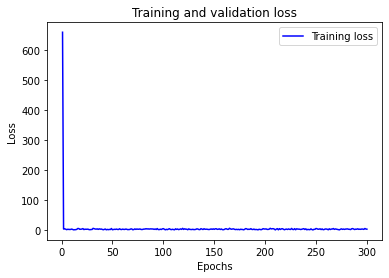

In [78]:
plt.plot( epochs, loss, 'b', label = 'Training loss' ) # 'bo' 파란색 점
#plt.plot( epochs, val_loss, 'b', label = 'Training loss' ) # 'bo' 파란색 실선
plt.title( 'Training and validation loss' )
plt.xlabel( 'Epochs' )
plt.ylabel( 'Loss' )
plt.legend()

plt.show()

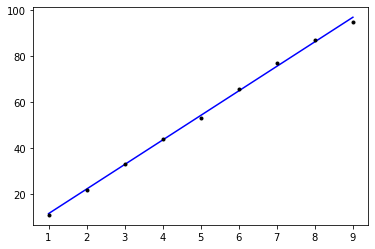

In [79]:
plt.plot(X, model.predict(X), 'b', X,y, 'k.')

위의 그래프에서 각 점은 우리가 실제 주었던 실제값에 해당되며, 
직선은 실제값으로부터 오차를 최소화하는 W와 b의 값을 가지는 직선입니다. 
이제 이 직선을 통해 9시간 30분을 공부하였을 때의 시험 성적을 예측하게 해봅시다. model.predict()은 학습이 완료된 모델이 입력된 데이터에 대해서 어떤 값을 예측하는지를 보여줍니다.

In [80]:
model.evaluate( X, y, batch_size = 1 )

9/1 [==============================================================================================================================================================================================================================================================================] - 0s 11ms/sample - loss: 2.5552 - mse: 1.0640


[1.064021804732167, 1.0640218]

In [27]:
print(model.predict([9.5]))

[[98.556465]]


###  검증 데이터 적용

In [50]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 1234 )

In [51]:
print( X_train, len( X_train ) )

[2 1 8 5 6 7 4] 7


In [52]:
print( X_test, len( X_test ) )

[9 3] 2


In [53]:
print( y_train, len( y_train ) )

[22 11 87 53 66 77 44] 7


In [54]:
print( y_test, len( y_test ) )

[95 33] 2


In [55]:
X_val = X_train[ :4 ]
partial_X_train = X_train[ 4: ]
y_val = y_train[ :4 ]
partial_y_train = y_train[ 4: ]

In [56]:
model=Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
sgd=optimizers.SGD(lr=0.01)
# 학습률(learning rate, lr)은 0.01로 합니다.
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])
# sgd는 경사 하강법을 의미.
# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
history = model.fit(partial_X_train,partial_y_train, batch_size=1, epochs=300, 
                    validation_data = ( X_val, y_val ) )
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.

Train on 3 samples, validate on 4 samples
Epoch 1/300
3/3 [==============================] - 1s 167ms/sample - loss: 1537.9954 - mse: 1537.9952 - val_loss: 1.9764 - val_mse: 1.9764
Epoch 2/300
3/3 [==============================] - 0s 15ms/sample - loss: 0.1709 - mse: 0.1709 - val_loss: 2.5711 - val_mse: 2.5711
Epoch 3/300
3/3 [==============================] - 0s 18ms/sample - loss: 0.1793 - mse: 0.1793 - val_loss: 2.0993 - val_mse: 2.0993
Epoch 4/300
3/3 [==============================] - 0s 20ms/sample - loss: 0.2113 - mse: 0.2113 - val_loss: 2.0934 - val_mse: 2.0934
Epoch 5/300
3/3 [==============================] - 0s 21ms/sample - loss: 0.1716 - mse: 0.1716 - val_loss: 1.8000 - val_mse: 1.8000
Epoch 6/300
3/3 [==============================] - 0s 22ms/sample - loss: 0.2777 - mse: 0.2777 - val_loss: 2.0817 - val_mse: 2.0817
Epoch 7/300
3/3 [==============================] - 0s 24ms/sample - loss: 0.1973 - mse: 0.1973 - val_loss: 1.9460 - val_mse: 1.9460
Epoch 8/300
3/3 [==========

3/3 [==============================] - 0s 15ms/sample - loss: 0.1664 - mse: 0.1664 - val_loss: 2.1979 - val_mse: 2.1979
Epoch 63/300
3/3 [==============================] - 0s 16ms/sample - loss: 0.0952 - mse: 0.0952 - val_loss: 1.5774 - val_mse: 1.5774
Epoch 64/300
3/3 [==============================] - 0s 15ms/sample - loss: 0.1173 - mse: 0.1173 - val_loss: 2.1905 - val_mse: 2.1905
Epoch 65/300
3/3 [==============================] - 0s 16ms/sample - loss: 0.1638 - mse: 0.1638 - val_loss: 2.1851 - val_mse: 2.1851
Epoch 66/300
3/3 [==============================] - 0s 15ms/sample - loss: 0.1387 - mse: 0.1387 - val_loss: 1.7010 - val_mse: 1.7010
Epoch 67/300
3/3 [==============================] - 0s 16ms/sample - loss: 0.1408 - mse: 0.1408 - val_loss: 1.6975 - val_mse: 1.6975
Epoch 68/300
3/3 [==============================] - 0s 15ms/sample - loss: 0.1566 - mse: 0.1566 - val_loss: 1.8008 - val_mse: 1.8008
Epoch 69/300
3/3 [==============================] - 0s 15ms/sample - loss: 0.1388 

3/3 [==============================] - 0s 15ms/sample - loss: 0.1130 - mse: 0.1130 - val_loss: 1.9366 - val_mse: 1.9366
Epoch 124/300
3/3 [==============================] - 0s 16ms/sample - loss: 0.0646 - mse: 0.0646 - val_loss: 1.4295 - val_mse: 1.4295
Epoch 125/300
3/3 [==============================] - 0s 15ms/sample - loss: 0.1282 - mse: 0.1282 - val_loss: 1.7277 - val_mse: 1.7277
Epoch 126/300
3/3 [==============================] - 0s 15ms/sample - loss: 0.1109 - mse: 0.1109 - val_loss: 1.7247 - val_mse: 1.7247
Epoch 127/300
3/3 [==============================] - 0s 15ms/sample - loss: 0.0896 - mse: 0.0896 - val_loss: 1.5341 - val_mse: 1.5341
Epoch 128/300
3/3 [==============================] - 0s 15ms/sample - loss: 0.0895 - mse: 0.0895 - val_loss: 1.4218 - val_mse: 1.4218
Epoch 129/300
3/3 [==============================] - 0s 16ms/sample - loss: 0.1119 - mse: 0.1119 - val_loss: 1.9161 - val_mse: 1.9161
Epoch 130/300
3/3 [==============================] - 0s 15ms/sample - loss: 

3/3 [==============================] - 0s 14ms/sample - loss: 0.0665 - mse: 0.0665 - val_loss: 1.4296 - val_mse: 1.4296
Epoch 185/300
3/3 [==============================] - 0s 15ms/sample - loss: 0.0528 - mse: 0.0528 - val_loss: 1.7475 - val_mse: 1.7475
Epoch 186/300
3/3 [==============================] - 0s 15ms/sample - loss: 0.0657 - mse: 0.0657 - val_loss: 1.7448 - val_mse: 1.7448
Epoch 187/300
3/3 [==============================] - 0s 16ms/sample - loss: 0.0638 - mse: 0.0638 - val_loss: 1.4254 - val_mse: 1.4254
Epoch 188/300
3/3 [==============================] - 0s 14ms/sample - loss: 0.0518 - mse: 0.0518 - val_loss: 1.7402 - val_mse: 1.7402
Epoch 189/300
3/3 [==============================] - 0s 15ms/sample - loss: 0.0645 - mse: 0.0645 - val_loss: 1.7376 - val_mse: 1.7376
Epoch 190/300
3/3 [==============================] - 0s 14ms/sample - loss: 0.0735 - mse: 0.0735 - val_loss: 1.7350 - val_mse: 1.7350
Epoch 191/300
3/3 [==============================] - 0s 14ms/sample - loss: 

3/3 [==============================] - 0s 15ms/sample - loss: 0.0521 - mse: 0.0521 - val_loss: 1.4865 - val_mse: 1.4865
Epoch 246/300
3/3 [==============================] - 0s 15ms/sample - loss: 0.0328 - mse: 0.0328 - val_loss: 1.2798 - val_mse: 1.2798
Epoch 247/300
3/3 [==============================] - 0s 15ms/sample - loss: 0.0367 - mse: 0.0367 - val_loss: 1.6173 - val_mse: 1.6173
Epoch 248/300
3/3 [==============================] - 0s 16ms/sample - loss: 0.0512 - mse: 0.0512 - val_loss: 1.6153 - val_mse: 1.6153
Epoch 249/300
3/3 [==============================] - 0s 14ms/sample - loss: 0.0509 - mse: 0.0509 - val_loss: 1.6134 - val_mse: 1.6134
Epoch 250/300
3/3 [==============================] - 0s 16ms/sample - loss: 0.0440 - mse: 0.0440 - val_loss: 1.6115 - val_mse: 1.6115
Epoch 251/300
3/3 [==============================] - 0s 14ms/sample - loss: 0.0519 - mse: 0.0519 - val_loss: 1.4785 - val_mse: 1.4785
Epoch 252/300
3/3 [==============================] - 0s 15ms/sample - loss: 

In [57]:
history_dict = history.history
loss = history_dict[ 'loss' ]
val_loss = history_dict[ 'val_loss' ]

epochs = range( 1, len( loss ) + 1 )

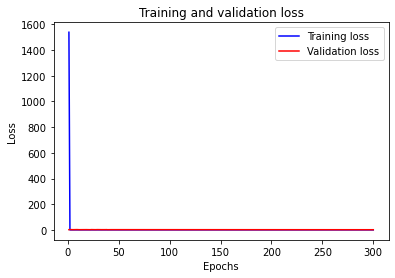

In [58]:
plt.plot( epochs, loss, 'b', label = 'Training loss' ) # 'b' 파란색 실선
plt.plot( epochs, val_loss, 'r', label = 'Validation loss' ) # 'b' 빨간색 실선
plt.title( 'Training and validation loss' )
plt.xlabel( 'Epochs' )
plt.ylabel( 'Loss' )
plt.legend()

plt.show()

In [74]:
evaluate = model.evaluate(X_test, y_test, batch_size=1)

2/1 [============================================================] - 0s 2ms/sample - loss: 3.6944 - mse: 7.0709


In [75]:
evaluate

[7.070886671543121, 7.0708866]

In [38]:
print(model.predict(X_test))

[[98.68136 ]
 [33.243134]]


###  검증용 데이터 - 비율

In [59]:
model=Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
sgd=optimizers.SGD(lr=0.01)
# 학습률(learning rate, lr)은 0.01로 합니다.
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])
# sgd는 경사 하강법을 의미.
# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
history = model.fit(X_train,y_train, batch_size=1, epochs=300, 
                    validation_split = 0.2 )
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.

Train on 5 samples, validate on 2 samples
Epoch 1/300
5/5 [==============================] - 0s 77ms/sample - loss: 867.5711 - mse: 867.5711 - val_loss: 4.8118 - val_mse: 4.8118
Epoch 2/300
5/5 [==============================] - 0s 10ms/sample - loss: 4.0187 - mse: 4.0187 - val_loss: 0.5399 - val_mse: 0.5399
Epoch 3/300
5/5 [==============================] - 0s 13ms/sample - loss: 2.7123 - mse: 2.7123 - val_loss: 0.4465 - val_mse: 0.4465
Epoch 4/300
5/5 [==============================] - 0s 14ms/sample - loss: 2.1820 - mse: 2.1820 - val_loss: 0.3026 - val_mse: 0.3026
Epoch 5/300
5/5 [==============================] - 0s 14ms/sample - loss: 2.2900 - mse: 2.2900 - val_loss: 0.4073 - val_mse: 0.4073
Epoch 6/300
5/5 [==============================] - 0s 13ms/sample - loss: 1.9314 - mse: 1.9314 - val_loss: 2.1664 - val_mse: 2.1664
Epoch 7/300
5/5 [==============================] - 0s 11ms/sample - loss: 2.5755 - mse: 2.5755 - val_loss: 0.2783 - val_mse: 0.2783
Epoch 8/300
5/5 [=============

5/5 [==============================] - 0s 10ms/sample - loss: 1.1558 - mse: 1.1558 - val_loss: 1.6172 - val_mse: 1.6172
Epoch 63/300
5/5 [==============================] - 0s 10ms/sample - loss: 0.9417 - mse: 0.9417 - val_loss: 0.4373 - val_mse: 0.4373
Epoch 64/300
5/5 [==============================] - 0s 10ms/sample - loss: 1.0247 - mse: 1.0247 - val_loss: 0.2002 - val_mse: 0.2002
Epoch 65/300
5/5 [==============================] - 0s 9ms/sample - loss: 0.5577 - mse: 0.5577 - val_loss: 2.2567 - val_mse: 2.2567
Epoch 66/300
5/5 [==============================] - 0s 9ms/sample - loss: 0.9087 - mse: 0.9087 - val_loss: 0.4796 - val_mse: 0.4796
Epoch 67/300
5/5 [==============================] - 0s 9ms/sample - loss: 1.0289 - mse: 1.0289 - val_loss: 0.1806 - val_mse: 0.1806
Epoch 68/300
5/5 [==============================] - 0s 9ms/sample - loss: 1.0493 - mse: 1.0493 - val_loss: 0.4936 - val_mse: 0.4936
Epoch 69/300
5/5 [==============================] - 0s 9ms/sample - loss: 0.7668 - mse

5/5 [==============================] - 0s 11ms/sample - loss: 0.8779 - mse: 0.8779 - val_loss: 1.4094 - val_mse: 1.4094
Epoch 124/300
5/5 [==============================] - 0s 11ms/sample - loss: 0.9026 - mse: 0.9026 - val_loss: 0.5838 - val_mse: 0.5838
Epoch 125/300
5/5 [==============================] - 0s 10ms/sample - loss: 0.6967 - mse: 0.6967 - val_loss: 0.0166 - val_mse: 0.0166
Epoch 126/300
5/5 [==============================] - 0s 9ms/sample - loss: 0.4731 - mse: 0.4731 - val_loss: 2.6020 - val_mse: 2.6020
Epoch 127/300
5/5 [==============================] - 0s 10ms/sample - loss: 1.1031 - mse: 1.1031 - val_loss: 1.5385 - val_mse: 1.5385
Epoch 128/300
5/5 [==============================] - 0s 10ms/sample - loss: 0.7899 - mse: 0.7899 - val_loss: 2.0885 - val_mse: 2.0885
Epoch 129/300
5/5 [==============================] - 0s 10ms/sample - loss: 1.1849 - mse: 1.1849 - val_loss: 0.1319 - val_mse: 0.1319
Epoch 130/300
5/5 [==============================] - 0s 10ms/sample - loss: 0

5/5 [==============================] - 0s 8ms/sample - loss: 0.6647 - mse: 0.6647 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 185/300
5/5 [==============================] - 0s 8ms/sample - loss: 0.8920 - mse: 0.8920 - val_loss: 0.2578 - val_mse: 0.2578
Epoch 186/300
5/5 [==============================] - 0s 7ms/sample - loss: 0.7622 - mse: 0.7622 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 187/300
5/5 [==============================] - 0s 8ms/sample - loss: 1.1214 - mse: 1.1214 - val_loss: 0.6957 - val_mse: 0.6957
Epoch 188/300
5/5 [==============================] - 0s 10ms/sample - loss: 0.9390 - mse: 0.9390 - val_loss: 0.3254 - val_mse: 0.3254
Epoch 189/300
5/5 [==============================] - 0s 10ms/sample - loss: 0.8946 - mse: 0.8946 - val_loss: 0.2903 - val_mse: 0.2903
Epoch 190/300
5/5 [==============================] - 0s 9ms/sample - loss: 0.7228 - mse: 0.7228 - val_loss: 0.0183 - val_mse: 0.0183
Epoch 191/300
5/5 [==============================] - 0s 9ms/sample - loss: 0.9654

5/5 [==============================] - 0s 10ms/sample - loss: 0.8832 - mse: 0.8832 - val_loss: 0.1258 - val_mse: 0.1258
Epoch 246/300
5/5 [==============================] - 0s 12ms/sample - loss: 0.5254 - mse: 0.5254 - val_loss: 2.4829 - val_mse: 2.4829
Epoch 247/300
5/5 [==============================] - 0s 11ms/sample - loss: 1.2029 - mse: 1.2029 - val_loss: 0.1364 - val_mse: 0.1364
Epoch 248/300
5/5 [==============================] - 0s 10ms/sample - loss: 0.5368 - mse: 0.5368 - val_loss: 2.4564 - val_mse: 2.4564
Epoch 249/300
5/5 [==============================] - 0s 9ms/sample - loss: 1.2678 - mse: 1.2678 - val_loss: 0.2103 - val_mse: 0.2103
Epoch 250/300
5/5 [==============================] - 0s 10ms/sample - loss: 0.8803 - mse: 0.8803 - val_loss: 0.3068 - val_mse: 0.3068
Epoch 251/300
5/5 [==============================] - 0s 9ms/sample - loss: 0.8123 - mse: 0.8123 - val_loss: 1.6032 - val_mse: 1.6032
Epoch 252/300
5/5 [==============================] - 0s 11ms/sample - loss: 0.

In [60]:
history_dict = history.history
loss = history_dict[ 'loss' ]
val_loss = history_dict[ 'val_loss' ]

epochs = range( 1, len( loss ) + 1 )

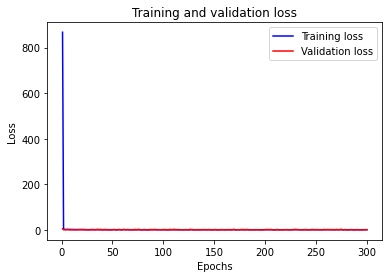

In [61]:
plt.plot( epochs, loss, 'b', label = 'Training loss' ) # 'b' 파란색 실선
plt.plot( epochs, val_loss, 'r', label = 'Validation loss' ) # 'b' 빨간색 실선
plt.title( 'Training and validation loss' )
plt.xlabel( 'Epochs' )
plt.ylabel( 'Loss' )
plt.legend()

plt.show()

In [62]:
print(model.predict(X_test))

[[97.19637 ]
 [32.378914]]


####  나이 X, 키 y

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
X = np.array( [ 15.43, 23.01, 5.00, 12.56, 8.67, 7.31, 9.66, 13.64, 
      14.92, 18.47, 15.48, 22.13, 10.11, 26.95, 5.68, 21.76 ] )
y = np.array( [ 170.91, 160.68, 129.00, 159.70, 155.46, 140.56, 153.65, 159.43, 
      164.70, 169.65, 160.71, 173.29, 159.31, 171.52, 138.96, 165.87 ] )

In [18]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 1234 )

In [20]:
model=Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
sgd=optimizers.SGD(lr=0.01)
# 학습률(learning rate, lr)은 0.01로 합니다.
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])
# sgd는 경사 하강법을 의미.
# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
history = model.fit(X_train,y_train, batch_size=1, epochs=300, shuffle=False)
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.

Train on 12 samples
Epoch 1/300
12/12 [==============================] - 0s 21ms/sample - loss: 5002520794.7519 - mse: 5002520576.0000
Epoch 2/300
12/12 [==============================] - 0s 1ms/sample - loss: 363332944317408.0000 - mse: 363332926177280.0000
Epoch 3/300
12/12 [==============================] - 0s 1ms/sample - loss: 26290560761709199360.0000 - mse: 26290561070217035776.0000
Epoch 4/300
12/12 [==============================] - 0s 1ms/sample - loss: 1902341446260757081620480.0000 - mse: 1902341235188380433645568.0000
Epoch 5/300
12/12 [==============================] - 0s 1ms/sample - loss: 137650329147032404363573198848.0000 - mse: 137650333883642277518777516032.0000
Epoch 6/300
12/12 [==============================] - 0s 1ms/sample - loss: 9960164984517963118940105228681216.0000 - mse: 9960164117690603701741415569555456.0000
Epoch 7/300
12/12 [==============================] - 0s 1ms/sample - loss: inf - mse: inf                                                          

Epoch 87/300
12/12 [==============================] - 0s 1ms/sample - loss: nan - mse: nan
Epoch 88/300
12/12 [==============================] - 0s 2ms/sample - loss: nan - mse: nan
Epoch 89/300
12/12 [==============================] - 0s 1ms/sample - loss: nan - mse: nan
Epoch 90/300
12/12 [==============================] - 0s 1ms/sample - loss: nan - mse: nan
Epoch 91/300
12/12 [==============================] - 0s 1ms/sample - loss: nan - mse: nan
Epoch 92/300
12/12 [==============================] - 0s 1ms/sample - loss: nan - mse: nan
Epoch 93/300
12/12 [==============================] - 0s 1ms/sample - loss: nan - mse: nan
Epoch 94/300
12/12 [==============================] - 0s 1ms/sample - loss: nan - mse: nan
Epoch 95/300
12/12 [==============================] - 0s 1ms/sample - loss: nan - mse: nan
Epoch 96/300
12/12 [==============================] - 0s 1ms/sample - loss: nan - mse: nan
Epoch 97/300
12/12 [==============================] - 0s 1ms/sample - loss: nan - mse: nan

12/12 [==============================] - 0s 1ms/sample - loss: nan - mse: nan
Epoch 177/300
12/12 [==============================] - 0s 1ms/sample - loss: nan - mse: nan
Epoch 178/300
12/12 [==============================] - 0s 1ms/sample - loss: nan - mse: nan
Epoch 179/300
12/12 [==============================] - 0s 1ms/sample - loss: nan - mse: nan
Epoch 180/300
12/12 [==============================] - 0s 1ms/sample - loss: nan - mse: nan
Epoch 181/300
12/12 [==============================] - 0s 1ms/sample - loss: nan - mse: nan
Epoch 182/300
12/12 [==============================] - 0s 1ms/sample - loss: nan - mse: nan
Epoch 183/300
12/12 [==============================] - 0s 1ms/sample - loss: nan - mse: nan
Epoch 184/300
12/12 [==============================] - 0s 1ms/sample - loss: nan - mse: nan
Epoch 185/300
12/12 [==============================] - 0s 1ms/sample - loss: nan - mse: nan
Epoch 186/300
12/12 [==============================] - 0s 1ms/sample - loss: nan - mse: nan
Ep

12/12 [==============================] - 0s 1ms/sample - loss: nan - mse: nan
Epoch 266/300
12/12 [==============================] - 0s 1ms/sample - loss: nan - mse: nan
Epoch 267/300
12/12 [==============================] - 0s 1ms/sample - loss: nan - mse: nan
Epoch 268/300
12/12 [==============================] - 0s 1ms/sample - loss: nan - mse: nan
Epoch 269/300
12/12 [==============================] - 0s 1ms/sample - loss: nan - mse: nan
Epoch 270/300
12/12 [==============================] - 0s 1ms/sample - loss: nan - mse: nan
Epoch 271/300
12/12 [==============================] - 0s 1ms/sample - loss: nan - mse: nan
Epoch 272/300
12/12 [==============================] - 0s 1ms/sample - loss: nan - mse: nan
Epoch 273/300
12/12 [==============================] - 0s 1ms/sample - loss: nan - mse: nan
Epoch 274/300
12/12 [==============================] - 0s 1ms/sample - loss: nan - mse: nan
Epoch 275/300
12/12 [==============================] - 0s 1ms/sample - loss: nan - mse: nan
Ep